<a href="https://colab.research.google.com/github/JeffersonEspinalA/Prueba/blob/main/Trabajo_Final_Procesamiento_de_Ima%CC%81genes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resumen de videos

## Instalando librerias

In [ ]:
!python -m pip install pytube

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.3 MB/s eta 0:00:00


## Librerias

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from IPython.display import Image
import datetime
import math
import os
from pytube import YouTube
from tqdm.notebook import tqdm
from tensorflow.keras.preprocessing import image

import cv2

## Descarga de video

Para la descarga del video, tenemos dos opciones.
- Descargar desde Google Drive, para ello debes ingresar el id del archivo.
- Descargar desde YouTube, para ello debes proporcionar el enlace del video.

### Descargamos el video desde Google Drive

In [ ]:
#@title Ingrese el ID del archivo en Drive. { run: "auto" }
id = "1EJqnUEpiP42yW6j1xy7-VfVoLFcNFVGD" #@param {type:"string"}
os.system(f"gdown --id {id}")

0

### Descargamos el video desde YouTube

**NOTA: La librería PyTube, puede que no funcione en algunas ocasiones, ya que YouTube se actualiza cada cierto tiempo y los desarrolladores también tienen que actualizar la librería, pero este actualización demora.**

In [ ]:
#@title Ingrese el enlace del video a descargar { run: "auto" }
link = "https://www.youtube.com/watch?v=Cf4YU-sRRBQ" #@param {type:"string"}

video = YouTube(link)
print("Las versiones del video para descargar son:")
video.streams.filter(file_extension = "mp4").all()

Las versiones del video para descargar son:


<ipython-input-4-2066a371223a>:6: DeprecationWarning: Call to deprecated function all (This object can be treated as a list, all() is useless).
  video.streams.filter(file_extension = "mp4").all()


[<Stream: itag="18" mime_type="video/mp4" res="360p" fps="24fps" vcodec="avc1.42001E" acodec="mp4a.40.2" progressive="True" type="video">,
 <Stream: itag="22" mime_type="video/mp4" res="720p" fps="24fps" vcodec="avc1.64001F" acodec="mp4a.40.2" progressive="True" type="video">,
 <Stream: itag="136" mime_type="video/mp4" res="720p" fps="24fps" vcodec="avc1.4d401f" progressive="False" type="video">,
 <Stream: itag="135" mime_type="video/mp4" res="480p" fps="24fps" vcodec="avc1.4d401e" progressive="False" type="video">,
 <Stream: itag="134" mime_type="video/mp4" res="360p" fps="24fps" vcodec="avc1.4d401e" progressive="False" type="video">,
 <Stream: itag="133" mime_type="video/mp4" res="240p" fps="24fps" vcodec="avc1.4d4015" progressive="False" type="video">,
 <Stream: itag="160" mime_type="video/mp4" res="144p" fps="24fps" vcodec="avc1.4d400c" progressive="False" type="video">,
 <Stream: itag="139" mime_type="audio/mp4" abr="48kbps" acodec="mp4a.40.5" progressive="False" type="audio">,
 <

In [ ]:
#@title Ingrese el itag de la versión del video para descargar
itag =  18#@param {type:"integer"}

video.streams.get_by_itag(itag=itag).download()

'/content/Dragon Ball Ending Latino HD 720p (sin créditos).mp4'

## Clase usada para extraer frames de un video

In [ ]:
class FrameExtractor():

    def __init__(self, video_path):
        self.video_path = video_path
        self.vid_cap = cv2.VideoCapture(video_path)
        self.n_frames = int(self.vid_cap.get(cv2.CAP_PROP_FRAME_COUNT))
        self.fps = int(self.vid_cap.get(cv2.CAP_PROP_FPS))

    def get_fps(self):
        return self.fps

    def get_n_frames(self):
        return self.n_frames

    def get_video_duration(self):
        print(self.n_frames)
        print(self.fps)
        duration = self.n_frames/self.fps
        print(f'Duracion: {datetime.timedelta(seconds=duration)}')

    def description_video(self):
        print("Archivo: ", self.video_path)
        self.get_video_duration()
        print("FPS: ", self.fps)
        print("# de Frames: ", self.n_frames)

    def get_n_images(self, every_x_frame):
        n_images = math.floor(self.n_frames / every_x_frame) + 1
        print(f'Extraer cada {every_x_frame} frame resultará en {n_images} imagenes.')

    def extract_frames(self, every_x_frame, img_name, dest_path=None, img_ext = '.jpg'):
        if not self.vid_cap.isOpened():
            self.vid_cap = cv2.VideoCapture(self.video_path)

        if dest_path is None:
            dest_path = os.getcwd()
        else:
            if not os.path.isdir(dest_path):
                os.mkdir(dest_path)
                print(f'Creado el siguiente directorio para la extracción: {dest_path}')

        frame_cnt = 0
        img_cnt = 0

        filenames = []
        while self.vid_cap.isOpened():

            success,image = self.vid_cap.read()

            if not success:
                break

            if frame_cnt % every_x_frame == 0:
                img_path = os.path.join(dest_path, ''.join([img_name, '_', str(img_cnt), img_ext]))
                print('Creando', img_path)
                filenames.append(img_path)

                cv2.imwrite(img_path, image)
                img_cnt += 1

            frame_cnt += 1

        self.vid_cap.release()
        cv2.destroyAllWindows()
        return filenames

## Probando con el primer video [2]

In [ ]:
video1 = FrameExtractor('/content/Dragon Ball Ending Latino HD 720p (sin créditos).mp4')
video1.description_video()
video1.get_n_images(20)

Archivo:  /content/Dragon Ball Ending Latino HD 720p (sin créditos).mp4
2327
23
Duracion: 0:01:41.173913
FPS:  23
# de Frames:  2327
Extraer cada 20 frame resultará en 117 imagenes.


### Extraemos los frames del video en la carpeta 'video1'.

In [ ]:
filenames = video1.extract_frames(20, 'img_video1', 'video1')

Creado el siguiente directorio para la extracción: video1
Creando video1/img_video1_0.jpg
Creando video1/img_video1_1.jpg
Creando video1/img_video1_2.jpg
Creando video1/img_video1_3.jpg
Creando video1/img_video1_4.jpg
Creando video1/img_video1_5.jpg
Creando video1/img_video1_6.jpg
Creando video1/img_video1_7.jpg
Creando video1/img_video1_8.jpg
Creando video1/img_video1_9.jpg
Creando video1/img_video1_10.jpg
Creando video1/img_video1_11.jpg
Creando video1/img_video1_12.jpg
Creando video1/img_video1_13.jpg
Creando video1/img_video1_14.jpg
Creando video1/img_video1_15.jpg
Creando video1/img_video1_16.jpg
Creando video1/img_video1_17.jpg
Creando video1/img_video1_18.jpg
Creando video1/img_video1_19.jpg
Creando video1/img_video1_20.jpg
Creando video1/img_video1_21.jpg
Creando video1/img_video1_22.jpg
Creando video1/img_video1_23.jpg
Creando video1/img_video1_24.jpg
Creando video1/img_video1_25.jpg
Creando video1/img_video1_26.jpg
Creando video1/img_video1_27.jpg
Creando video1/img_video1_28

### Mostramos uno de los frames extraidos del video

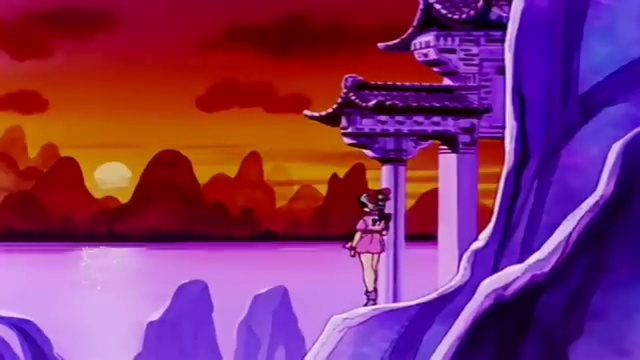

In [ ]:
display(Image(filenames[25]))

## Probando con el segundo video [3]

In [ ]:
video2 = FrameExtractor('/content/Dragon Ball Ending Latino HD 720p (sin créditos).mp4')
video2.description_video()
video2.get_n_images(20)

Archivo:  /content/Dragon Ball Ending Latino HD 720p (sin créditos).mp4
2327
23
Duracion: 0:01:41.173913
FPS:  23
# de Frames:  2327
Extraer cada 20 frame resultará en 117 imagenes.


### Extraemos los frames del video en la carpeta 'video2'.

In [ ]:
filenames = video2.extract_frames(20, 'img_video2', 'video2')

Creado el siguiente directorio para la extracción: video2
Creando video2/img_video2_0.jpg
Creando video2/img_video2_1.jpg
Creando video2/img_video2_2.jpg
Creando video2/img_video2_3.jpg
Creando video2/img_video2_4.jpg
Creando video2/img_video2_5.jpg
Creando video2/img_video2_6.jpg
Creando video2/img_video2_7.jpg
Creando video2/img_video2_8.jpg
Creando video2/img_video2_9.jpg
Creando video2/img_video2_10.jpg
Creando video2/img_video2_11.jpg
Creando video2/img_video2_12.jpg
Creando video2/img_video2_13.jpg
Creando video2/img_video2_14.jpg
Creando video2/img_video2_15.jpg
Creando video2/img_video2_16.jpg
Creando video2/img_video2_17.jpg
Creando video2/img_video2_18.jpg
Creando video2/img_video2_19.jpg
Creando video2/img_video2_20.jpg
Creando video2/img_video2_21.jpg
Creando video2/img_video2_22.jpg
Creando video2/img_video2_23.jpg
Creando video2/img_video2_24.jpg
Creando video2/img_video2_25.jpg
Creando video2/img_video2_26.jpg
Creando video2/img_video2_27.jpg
Creando video2/img_video2_28

### Mostramos uno de los frames extraidos del video

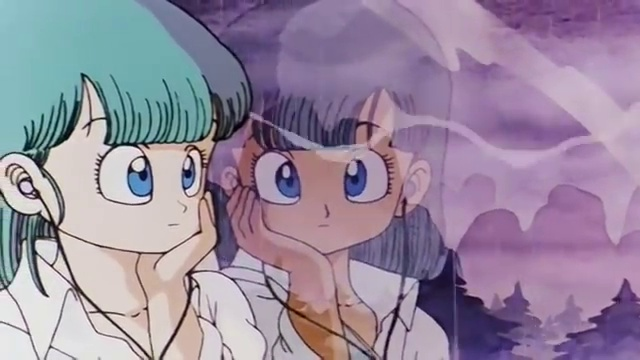

In [ ]:
display(Image(filenames[10]))

## Métodos para hallar la similaridad entre los frames consecutivos del video.

### **1. Diferencia entre pixeles**

#### Cargamos todos los frames extraidos en un arreglo y lo normalizamos en escala [0 - 1].

In [ ]:
im_array = []
for filename in tqdm(filenames):
    img = plt.imread(filename)
    im_array.append(img)

im_array = np.array(im_array) / 255.0
im_array.shape

  0%|          | 0/117 [00:00<?, ?it/s]

(117, 360, 640, 3)

#### Utilizaremos la distancia euclidiana entre los pixeles para hallar la similaridad entre dos frames consecutivos.

In [ ]:
im_array.shape

(117, 360, 640, 3)

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances

Función que calcula la distancia euclidiana entre los pixeles de dos frames.

In [ ]:
#Su código aquí
def reshape_img_3d_2d(img):
  if len(img.shape) != 3:
    return None
  dim = img.shape
  reshaped_img = img.reshape((dim[0]*dim[1]), dim[2])
  return reshaped_img

def euclidean_dist_pixel(x,y):
  def euclidean_pixel(p1, p2):
    sum = 0
    for i in range(len(p1)):
      sum = (p1[i] - p2[i]) ** 2
    return math.sqrt(sum)
  result = []
  for i in range(len(x)):
    result.append(euclidean_pixel(x[i], y[i]))
  return result

  0%|          | 0/116 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Diferencia entre todos los pixeles de todos los frames consecutivos')

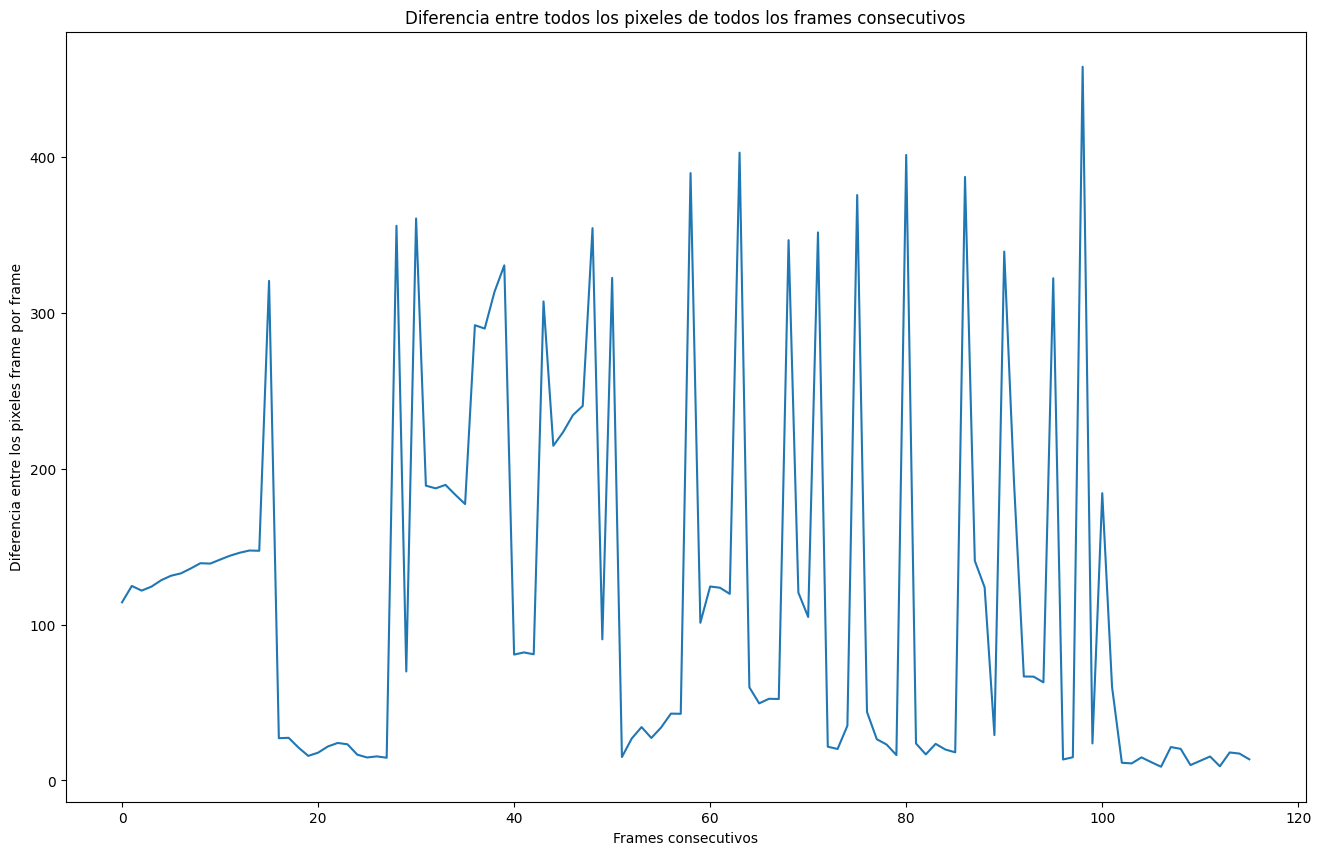

In [ ]:
result = []
for i in tqdm(range(len(im_array) - 1)):
  firs_img = [im_array[i].flatten()]
  second_img = [im_array[i+1].flatten()]
  aux = euclidean_distances(firs_img, second_img)
  result.append(aux[0])

plt.figure(figsize=(16,10))
plt.plot(result)
plt.xlabel("Frames consecutivos")
plt.ylabel("Diferencia entre los pixeles frame por frame")
plt.title("Diferencia entre todos los pixeles de todos los frames consecutivos")

### **2. Diferencia entre histogramas**

In [ ]:
from sklearn.metrics.pairwise import manhattan_distances
from skimage.color import rgb2gray

Se convierte los frames RGB en escala de grises.

In [ ]:
im_array_gray = np.float32(rgb2gray(im_array) * 255.0)

Mostrar un frame específico extraido del video en escala de grises

Histograma de la imagen anterior ([calcHist](https://docs.opencv.org/4.x/d1/db7/tutorial_py_histogram_begins.html))

(360, 640)

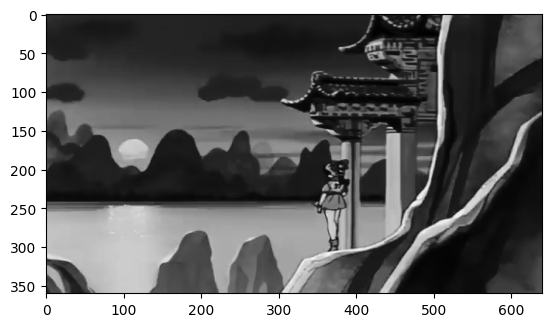

In [ ]:
id = 18
plt.imshow(im_array_gray[id], cmap='gray')
im_array_gray[id].shape

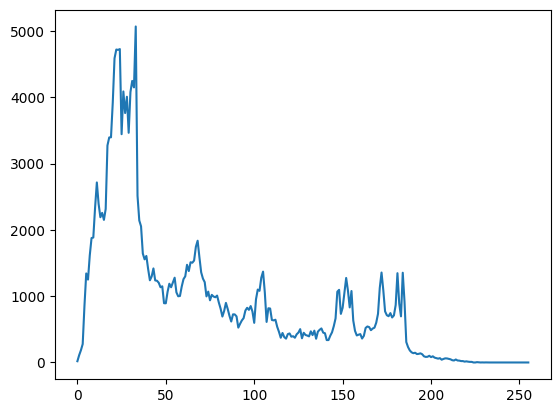

In [ ]:
# Su código aquí
hist = cv2.calcHist([im_array_gray[id]], [0], None, [256], [0,256]).flatten()
plt.plot(hist)

In [ ]:
def manhattan_dist_hist(x,y):
  def manhatan_color_pixel(p1, p2):
    return abs(p1- p2)
  result = []

  for i in range(len(x)):
    result.append(manhatan_color_pixel(x[i], y[i]))

  return result

0


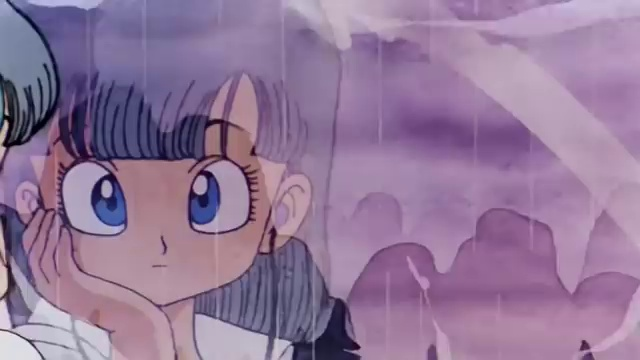

1


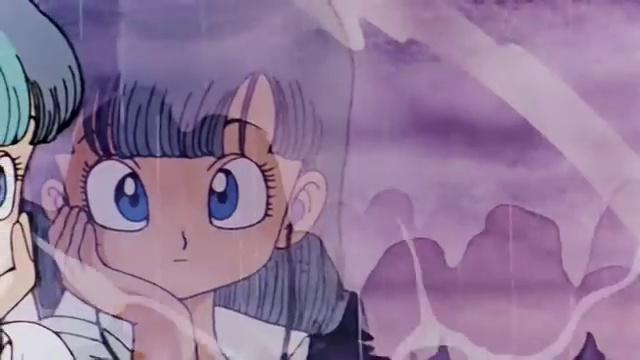

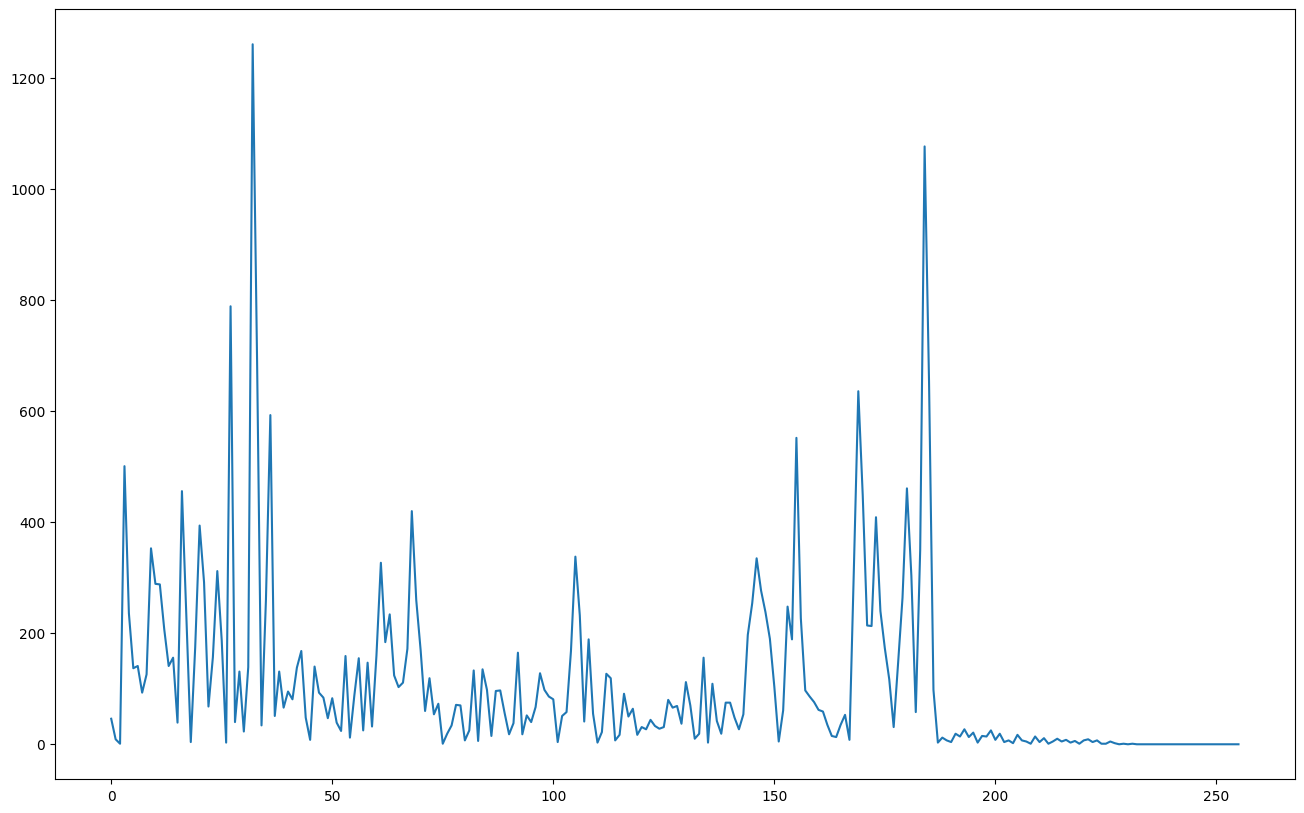

In [ ]:
id_img = 0
if (id_img + 1 >= len(filenames)):
  print(f'Debe ingresar un numero entre 0 y {len(filenames) - 2}')
else:
  print(id_img)
  display(Image(filenames[id_img]))
  print(id_img+1)
  display(Image(filenames[id_img + 1]))

  first_hist = cv2.calcHist([im_array_gray[id]], [0], None, [256], [0,256]).flatten()
  second_hist = cv2.calcHist([im_array_gray[id + 1]], [0], None, [256], [0,256]).flatten()

  result = manhattan_dist_hist(first_hist, second_hist)
  plt.figure(figsize = (16,10))
  plt.plot(result)

In [ ]:
result

[46.0,
 9.0,
 1.0,
 501.0,
 236.0,
 137.0,
 141.0,
 93.0,
 126.0,
 353.0,
 289.0,
 288.0,
 207.0,
 141.0,
 156.0,
 39.0,
 456.0,
 229.0,
 4.0,
 175.0,
 394.0,
 292.0,
 68.0,
 157.0,
 312.0,
 187.0,
 3.0,
 789.0,
 40.0,
 131.0,
 23.0,
 139.0,
 1261.0,
 689.0,
 34.0,
 260.0,
 593.0,
 51.0,
 131.0,
 66.0,
 95.0,
 81.0,
 138.0,
 168.0,
 48.0,
 8.0,
 140.0,
 93.0,
 84.0,
 47.0,
 83.0,
 39.0,
 24.0,
 159.0,
 12.0,
 88.0,
 155.0,
 25.0,
 147.0,
 32.0,
 160.0,
 327.0,
 184.0,
 234.0,
 124.0,
 103.0,
 111.0,
 172.0,
 420.0,
 260.0,
 169.0,
 60.0,
 119.0,
 54.0,
 73.0,
 1.0,
 19.0,
 34.0,
 71.0,
 70.0,
 7.0,
 25.0,
 133.0,
 6.0,
 135.0,
 98.0,
 15.0,
 96.0,
 97.0,
 56.0,
 18.0,
 38.0,
 165.0,
 18.0,
 52.0,
 40.0,
 67.0,
 128.0,
 98.0,
 86.0,
 81.0,
 4.0,
 51.0,
 58.0,
 168.0,
 338.0,
 232.0,
 41.0,
 189.0,
 55.0,
 3.0,
 22.0,
 127.0,
 119.0,
 7.0,
 17.0,
 91.0,
 50.0,
 64.0,
 17.0,
 31.0,
 27.0,
 44.0,
 33.0,
 28.0,
 31.0,
 80.0,
 66.0,
 69.0,
 37.0,
 112.0,
 70.0,
 10.0,
 19.0,
 156.0,
 3.0,
 1

#### Utilizaremos la distancia manhattan entre los histogramas para hallar la similaridad entre dos frames consecutivos.

Función que calcula la distancia manhattan entre la frecuencia de los colores de los pixeles de dos histogramas.

Calculamos la distancia manhattan entre dos frames consecutivos de forma que: Se halla la distancia manhattan entre la frecuencia de los colores de los pixeles de dos histogramas.

Hallamos la distancia manhattan entre los histogramas de todos los frames consecutivos que se extrajo del video.

  0%|          | 0/116 [00:00<?, ?it/s]

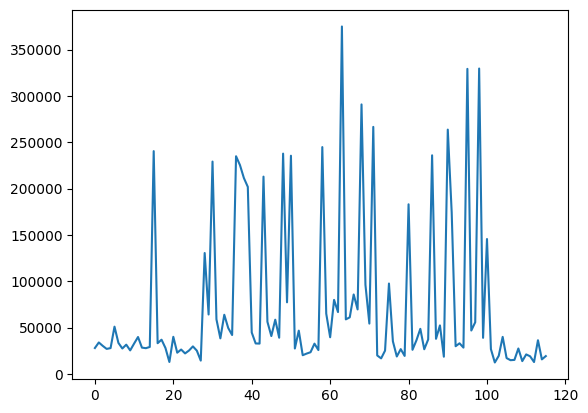

In [ ]:
# Su código aquí
result = []
for i in tqdm(range(len(im_array) - 1)):
  first_hist = cv2.calcHist([im_array_gray[i]], [0], None, [256], [0,256]).flatten()
  second_hist = cv2.calcHist([im_array_gray[i + 1]], [0], None, [256], [0,256]).flatten()

  aux = manhattan_distances([first_hist], [second_hist]).flatten()
  result.append(aux[0])

plt.plot(result)

### **3. Diferencia entre vectores red convolucional**

#### Usaremos la red neuronal convolucional ResNet50.

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
model = ResNet50(weights='imagenet', include_top=False)
target_size=(224, 224)
print("Modelo cargado: {}".format(model.name))

94765736/94765736 [==============================] - 0s 0us/step
Modelo cargado: resnet50


In [ ]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                        

Usamos ResNet50, para hallar los vectores de los frames

In [ ]:
features = []
for filename in tqdm(filenames):
  img = image.load_img(filename, target_size=target_size)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  features.append(model.predict(x).ravel())
features = np.array(features)
features.shape

  0%|          | 0/117 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step


(117, 100352)

#### Utilizaremos la distancia coseno entre los vectores de los frames para hallar la similaridad entre dos frames consecutivos.

Hallamos la distancia coseno entre los vectores de todos los frames consecutivos que se extrajo del video.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

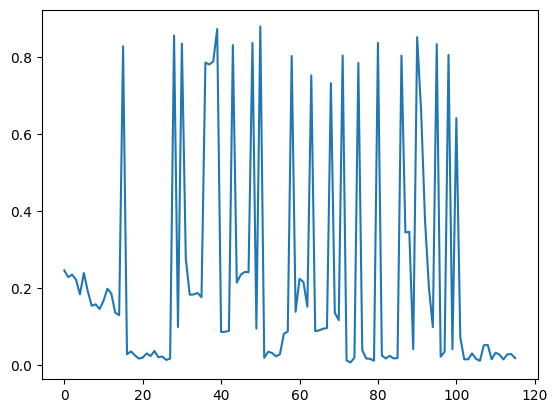

In [ ]:
# Su código aquí
# Recomendación: usar cosine_similarity para features

result = []
for i in range(len(features) - 1):
  aux = cosine_similarity(features[i: i+1], features[i+1:i+2]).flatten()
  result.append(1 - aux[0])

plt.plot(result)

## Referencias

[1] E. Lewinson, "The easiest way to download YouTube videos using Python", Medium, 2020. [Online]. Available: https://towardsdatascience.com/the-easiest-way-to-download-youtube-videos-using-python-2640958318ab. [Accessed: 21- Jun- 2021].

[2] snakewalkerTK421, Dragon Ball Ending Latino HD 720p (sin créditos) [Dragon Ball Ending Latino HD 720p (sin créditos)]. 2016. [Online]. Available: https://www.youtube.com/watch?v=Cf4YU-sRRBQ&ab_channel=CaminskiTV (sin créditos)
. [Accessed: 22- May- 2023].


## Resumen de video

Utilizamos los frames obtenidos y las distancias para crear el resumen de un video.

In [ ]:
# Su código aquí
